In [1]:
from google.colab import drive #This code connects Google Colab to your Google Drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


**import librires**

In [7]:
import pandas as pd  # for data manipulation
import numpy as np   # for numerical operations
import matplotlib.pyplot as plt  # for data visualization

**Lode the dataset**

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/credit_scoring_eng.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
5,0,-926.185831,27,masters degree,0,civil partnership,1,M,partner,0,255763.565419,purchase of the house
6,0,-2879.202052,43,masters degree,0,married,0,F,partner,0,240525.971920,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,135823.934197,education
8,2,-6929.865299,35,MASTERS DEGREE,0,civil partnership,1,F,employee,0,95856.832424,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,144425.938277,purchase of the house for my family


In [ ]:
df.describe(include = "all") # generates descriptive statistics (count,mean,unique values for all columns)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


In [ ]:
df.isnull().sum() #counts  missing values in each column

,0
children,0
days_employed,2174
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


**Handling Missing Data**

In [41]:
df['total_income'].fillna(df['total_income'].median(), inplace=True)  #Fills missing values in the total_income column with the median income value.
df['days_employed'].fillna(0, inplace=True)
#Fills missing values in the days_employed column with 0.



<ipython-input-41-9f482e0d8f68>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_income'].fillna(df['total_income'].median(), inplace=True)  #Fills missing values in the total_income column with the median income value.
<ipython-input-41-9f482e0d8f68>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [52]:
df.isnull().sum() #Verifies if all missing values are handled.

,0
children,0
days_employed,0
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


**Finding Outliers and Handling data**

<function matplotlib.pyplot.show(close=None, block=None)>

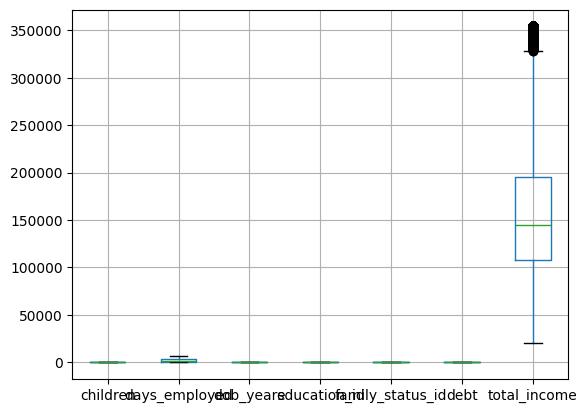

In [44]:
df.boxplot()   #to visualize the distribution and detect outliers
plt.show

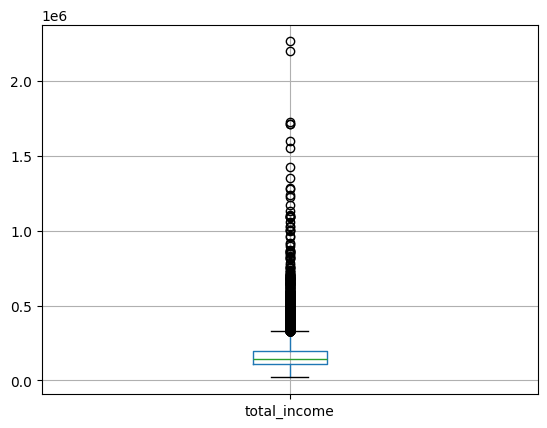

In [ ]:
df.boxplot(column="total_income")
plt.show()

In [55]:
#Handling Outliers (using IQR)
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)#frist quartile
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)#third qiartile
IQR = Q3 - Q1 # Interquartile range
# Removing outliers beyond 1.5 times the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)

print("Outlier counts per column:\n", outliers.sum())


Outlier counts per column:
 children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
debt                0
total_income        0
dtype: int64


**Handle Duplictae Data**

In [34]:
# Identify duplicate rows
duplicates = df.duplicated()

# Display duplicate rows
duplicate_rows = df[duplicates]


In [53]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [56]:
df_cleaned

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,6431.915133,42,masters degree,1,married,0.0,F,employee,0,253875.639453,purchase of the house
1,1.0,4024.803754,36,secondary education,1,married,0.0,F,employee,0,112080.014102,car purchase
2,0.0,5623.422610,33,Secondary Education,1,married,0.0,M,employee,0,145885.952297,purchase of the house
3,2.5,4124.747207,32,secondary education,1,married,0.0,M,employee,0,267628.550329,supplementary education
4,0.0,3393.395554,53,secondary education,1,civil partnership,1.0,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1.0,4529.316663,43,secondary education,1,civil partnership,1.0,F,partner,0,224791.862382,housing transactions
21521,0.0,3393.395554,67,secondary education,1,married,0.0,F,retiree,0,155999.806512,purchase of a car
21522,1.0,2113.346888,38,secondary education,1,civil partnership,1.0,M,employee,0,89672.561153,property
21523,2.5,3112.481705,38,secondary education,1,married,0.0,M,employee,0,244093.050500,buying my own car


**Handle incorrect data**

In [50]:
#whatever the negative values in colm days_employed should be positive
df['days_employed'] = df['days_employed'].abs()


In [58]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,6431.915133,42,masters degree,1,married,0.0,F,employee,0,253875.639453,purchase of the house
1,1.0,4024.803754,36,secondary education,1,married,0.0,F,employee,0,112080.014102,car purchase
2,0.0,5623.422610,33,Secondary Education,1,married,0.0,M,employee,0,145885.952297,purchase of the house
3,2.5,4124.747207,32,secondary education,1,married,0.0,M,employee,0,267628.550329,supplementary education
4,0.0,3393.395554,53,secondary education,1,civil partnership,1.0,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1.0,4529.316663,43,secondary education,1,civil partnership,1.0,F,partner,0,224791.862382,housing transactions
21521,0.0,3393.395554,67,secondary education,1,married,0.0,F,retiree,0,155999.806512,purchase of a car
21522,1.0,2113.346888,38,secondary education,1,civil partnership,1.0,M,employee,0,89672.561153,property
21523,2.5,3112.481705,38,secondary education,1,married,0.0,M,employee,0,244093.050500,buying my own car


In [60]:
#all values in the education column to lowercase and removing any extra spaces
df['education'] = df['education'].str.lower().str.strip()

In [61]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,6431.915133,42,masters degree,1,married,0.0,F,employee,0,253875.639453,purchase of the house
1,1.0,4024.803754,36,secondary education,1,married,0.0,F,employee,0,112080.014102,car purchase
2,0.0,5623.422610,33,secondary education,1,married,0.0,M,employee,0,145885.952297,purchase of the house
3,2.5,4124.747207,32,secondary education,1,married,0.0,M,employee,0,267628.550329,supplementary education
4,0.0,3393.395554,53,secondary education,1,civil partnership,1.0,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1.0,4529.316663,43,secondary education,1,civil partnership,1.0,F,partner,0,224791.862382,housing transactions
21521,0.0,3393.395554,67,secondary education,1,married,0.0,F,retiree,0,155999.806512,purchase of a car
21522,1.0,2113.346888,38,secondary education,1,civil partnership,1.0,M,employee,0,89672.561153,property
21523,2.5,3112.481705,38,secondary education,1,married,0.0,M,employee,0,244093.050500,buying my own car


In [62]:
#3 checking for incorrect values in categorical columns
#for gender colm it must be only 'M' and 'F'
print(df['gender'].unique())

['F' 'M' 'XNA']


In [63]:
#deleting XNA from gender colm
df = df[df['gender'] != 'XNA']

In [64]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,6431.915133,42,masters degree,1,married,0.0,F,employee,0,253875.639453,purchase of the house
1,1.0,4024.803754,36,secondary education,1,married,0.0,F,employee,0,112080.014102,car purchase
2,0.0,5623.422610,33,secondary education,1,married,0.0,M,employee,0,145885.952297,purchase of the house
3,2.5,4124.747207,32,secondary education,1,married,0.0,M,employee,0,267628.550329,supplementary education
4,0.0,3393.395554,53,secondary education,1,civil partnership,1.0,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1.0,4529.316663,43,secondary education,1,civil partnership,1.0,F,partner,0,224791.862382,housing transactions
21521,0.0,3393.395554,67,secondary education,1,married,0.0,F,retiree,0,155999.806512,purchase of a car
21522,1.0,2113.346888,38,secondary education,1,civil partnership,1.0,M,employee,0,89672.561153,property
21523,2.5,3112.481705,38,secondary education,1,married,0.0,M,employee,0,244093.050500,buying my own car


In [65]:
print(df['gender'].unique())

['F' 'M']
